In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [240]:
# creating a function to enhance the fabric images
def enhance_fabric(img):
    image = img.copy()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blr = cv2.GaussianBlur(gray, (11,11), 0)

    dst = cv2.fastNlMeansDenoising(blr, None, 10, 7, 21)

    _,binarized = cv2.threshold(dst,127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    

    # show thresholded image
    plt.figure(figsize=(4,4))
    plt.imshow(binarized, cmap='gray')
    plt.title('Thresholded Image')
    plt.show()
    

    kernal = np.ones((5,5), np.uint8)

    erosion = cv2.erode(binarized, kernal, iterations=1)
    dilation = cv2.dilate(erosion, kernal, iterations=1)
    
    if (dilation == 0).sum() > 1:
        print('The image is defective')
        contours,_ = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        
        
        # print contours area
        area = []
        for i in contours:
            area.append(cv2.contourArea(i))
        print('The max area is: ', max(area))

        for i in contours:
            if cv2.contourArea(i) ==  max(area):
                cv2.drawContours(image, [i], -1, (0,255,0), 3)
        plt.figure(figsize=(10,10))
        plt.imshow(image)
        plt.title('Defects Detected')
        plt.show()
    else:
        print('The image is not defective')
    return dilation

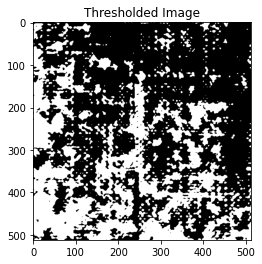

The image is defective
The max area is:  14378.0


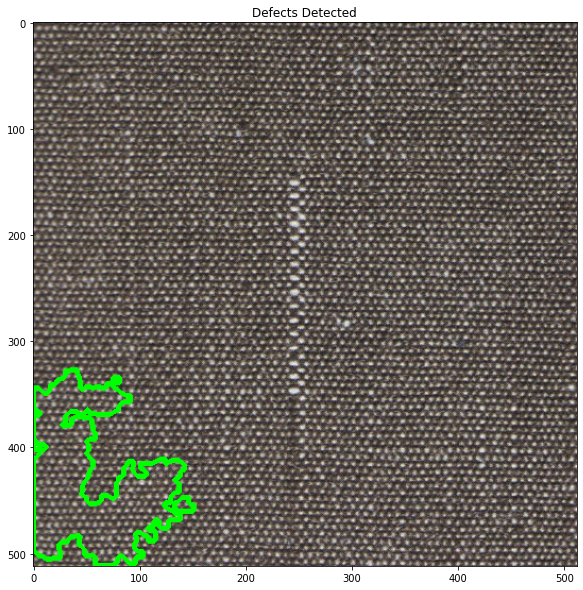

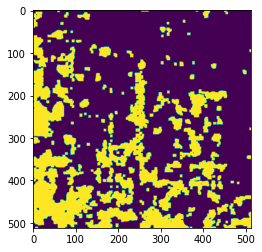

In [241]:
img = cv2.imread('Data/Task4/Fabric17.jpg')

# calling the function to enhance the fabric image
enhanced_fabric = enhance_fabric(img)

# displaying the enhanced fabric image
plt.imshow(enhanced_fabric)